In [1]:
import urllib.parse
import urllib.request
import pandas as pd
import re
from tqdm.notebook import tqdm
import numpy as np
import pickle
import missingno as msno
import multiprocessing 
from multiprocessing import Manager, Pool
num_cores = int(multiprocessing.cpu_count()/16)
import random

In [2]:
with open('/home/geonwon/Code/Database/mappingdict(KIN_ACC_ID)HMM.pickle', 'rb') as fr:
    mappingdict = pickle.load(fr)


In [3]:
dfhmm = pd.read_pickle("/home/geonwon/Code/Database/mappingdict(KINASE)HMM.pkl")
dfhmm
dfhmmhuman = dfhmm[dfhmm['species']=='HUMAN']

In [4]:
seqtemp = {}
for line in dfhmm.to_numpy():
    seqtemp[line[4]] = line[1]

seqhumantemp = {}
for line in dfhmmhuman.to_numpy():
    seqhumantemp[line[4]] = line[1]

In [5]:
dfpsp1 = pd.read_csv('/home/geonwon/Code/Kinase_Substrate_Dataset',encoding = 'ISO-8859-1', header = 2, delimiter = '\t')

In [6]:
dfpsp2 = dfpsp1.dropna(subset = ['KIN_ACC_ID'])
dfpsp2['KIN_ACC_ID'] = dfpsp2['KIN_ACC_ID'].apply(lambda x:x.replace("-2","")
                                            .replace("-3","")
                                            .replace("-8","")
                                            .replace("-10",""))
dfpsp2 = dfpsp2[dfpsp2['KIN_ACC_ID'].isin(mappingdict.keys())]

/tmp/ipykernel_504440/2521154912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpsp2['KIN_ACC_ID'] = dfpsp2['KIN_ACC_ID'].apply(lambda x:x.replace("-2","")


In [7]:
dfpsp1[dfpsp1['KIN_ACC_ID']=='NP_001178933']
dfpsp1['KIN_ACC_ID'].unique()

array(['Q5U4C9', 'Q64303', 'Q9BQI3', 'Q05655', 'Q9P1W9', 'Q9UQM7',
       'P68400', 'Q86Y07-2', 'O14965', 'Q9QY78', 'O55098', 'P35269',
       'O95835', 'Q8BG48', 'Q03526', 'P09619', 'Q80X41', 'P12798',
       'P50613', 'P22455', 'F1M2K4', 'Q60855', 'P49185', 'Q9NR20',
       'P34152-2', 'Q01279', 'Q15208', 'Q9UGJ0', 'P39688', 'Q13131',
       'Q9NYV4', 'Q16566', 'G1T8E2', 'P54646', 'Q9Y2H1', 'Q9Y5S2',
       'Q66JT0', 'Q5EG47', 'P49674', 'P97313', 'P49138', 'Q14012',
       'Q8BSK8', 'P00565', 'Q59H18', 'A9UF07', 'P07947', 'P31750',
       'P68404-2', 'P54763', 'P48736', 'Q9UHD2', 'Q9ERH7', 'Q02763',
       'NP_001178933', 'O94806', 'P07333', 'P05771-2', 'Q8R3L8', 'P43405',
       'Q9UEW8', 'P57058', 'Q07014', 'Q8K3H5', 'Q62074', 'Q03147',
       'P51617', 'O76039', 'P68181', 'Q15759', 'Q15303', 'Q6J9G0',
       'O55047', 'Q9BXM7', 'Q63699', 'G3V9H8', 'P35918', 'Q9QX70',
       'P04049', 'P15531', 'Q32MK0', 'P21127', 'Q9WV60', 'Q9R117',
       'Q8UWG6', 'P49137', 'O70293', 'Q62925', '

In [7]:
df1 = pd.read_excel('DEPOD.xls', header = 0)
df1

,Substrate accession number,Substrate Gene name/s,Phosphosites and 5 aminoa cid window around it,Phosphorylating protein kinases,Bioassay/s,Literature support,Source database,Dephosphorylation site and 5 amino acid window around it,Dephosphorylating protein phosphatases,Literature support.1
0,O00168,FXYD1,S83_EEGTFRSsIRRLSTR,PKA_group,LTP,10556585,PhosphoELM,s88_SIRRLsTRRR,PPP1CC,26668322
1,O00168,FXYD1,"S83_EEGTFRSsIRRLSTR, S88_RSSIRRLsTRRR",PRKACA,NaN,NaN,PhosphoSitePlus,s88_SIRRLsTRRR,PPP1CC,26668322
2,O00168,FXYD1,"S83_EEGTFRSsIRRLSTR, S88_RSSIRRLsTRRR",PRKCA,NaN,NaN,PhosphoSitePlus,s88_SIRRLsTRRR,PPP1CC,26668322
3,O00168,FXYD1,"S82_EEEGTFRsSIRRLST, S83_EEGTFRSsIRRLSTR, S88_...",Unknown,"LTP, in vitro, in vivo","15621037, 16155364, 20166139, 7999001","HPRD, PhosphoELM",s88_SIRRLsTRRR,PPP1CC,26668322
4,O00401,"N-WASP, WASL","Y175_EITTNRFyGPQVNNI, Y256_RETSKVIyDFIEKTG",ABL1,"in vitro, in vivo","16199863, 17389395, 18452278, 18707149, 194156...",HPRD,y256_TSKVIyDFIEK,PTPN2,16293614
...,...,...,...,...,...,...,...,...,...,...
2433,Q9UKK9,NUDT5,"S10_SQEPTESsQNGKQYI, S3_MEsQEPTESS, S9_ESQEPTE...",Unknown,"HTP, in vivo","15592455, 19413330, 20068231","HPRD, PhosphoELM",NaN,NaN,NaN
2434,Q7Z2E3,APTX,T125_AKNPGLEtHRKRKRS,PRKCG,NaN,NaN,PhosphoSitePlus,NaN,NaN,NaN
2435,Q7Z2E3,APTX,"S118_IVEFEEEsKNPGLET, S132_THRKRKRsGNSDSIE, S3...",Unknown,in vivo,"19651622, 20068231",HPRD,NaN,NaN,NaN
2436,Q9BRF8,CPPED1,T17_FHRARGRtLAAFPAE,Unknown,in vivo,18452278,HPRD,NaN,NaN,NaN


<AxesSubplot:>

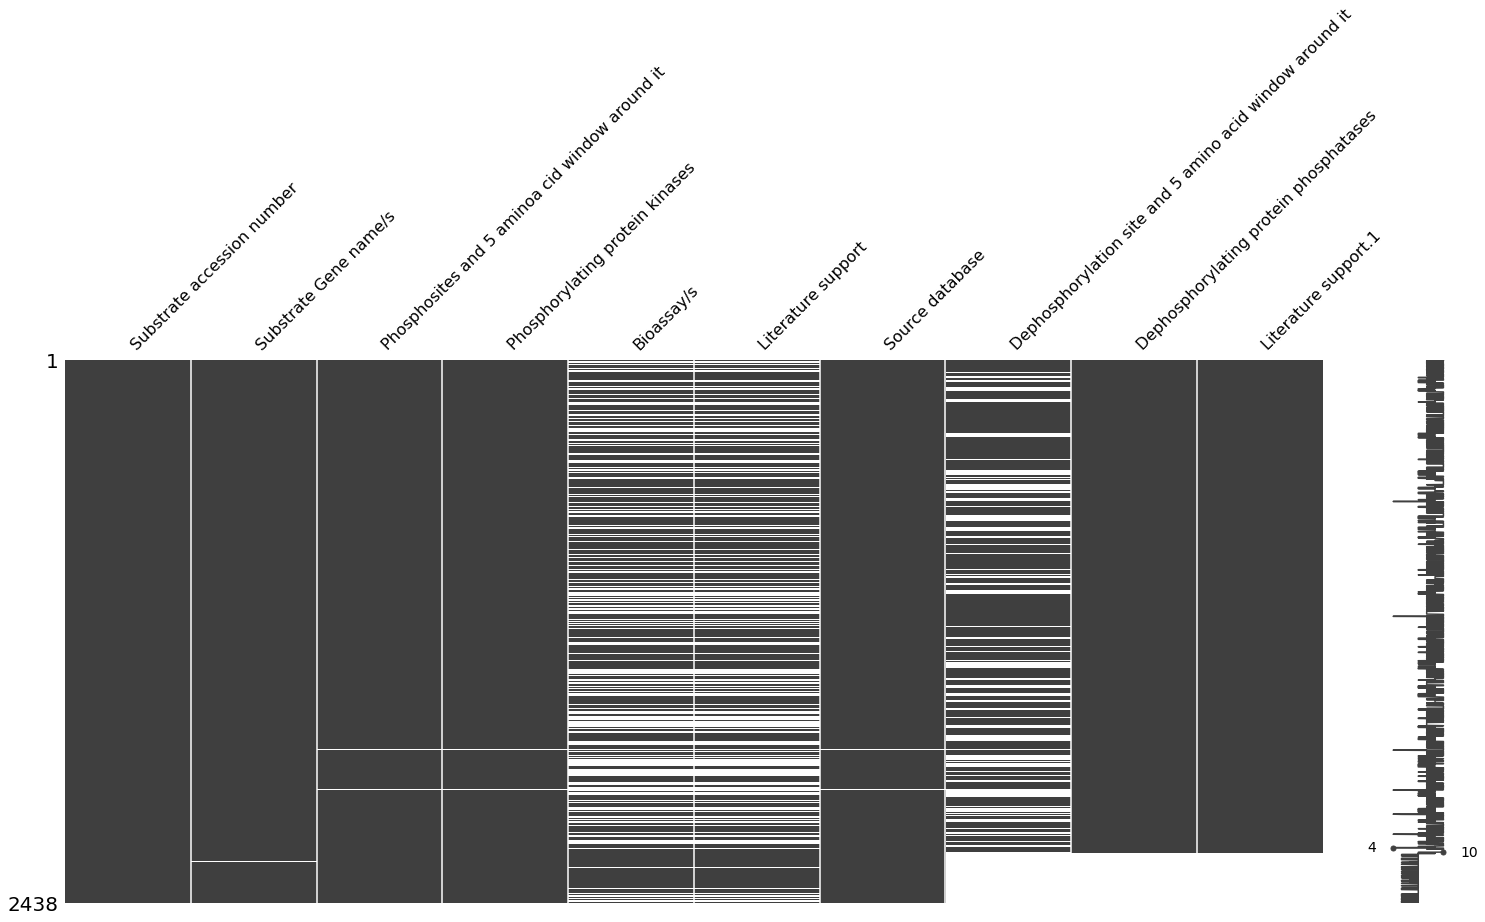

In [8]:
msno.matrix(df1)

In [9]:
df1 = df1.dropna(subset=['Phosphosites and 5 aminoa cid window around it'])
df1 = df1.dropna(subset=['Phosphorylating protein kinases'])
df1 = df1[df1['Phosphorylating protein kinases'] != 'Unknown']
df2 = df1[df1['Source database'] != 'PhosphoSitePlus']


In [10]:
df2['Phosphorylating protein kinases'].iloc[1]

'ABL1'

In [11]:
dfhmm[(dfhmm['KINASE']=='ABL1')&(dfhmm['species']=='HUMAN')]

,KIN_ACC_ID,seq,species,len,KINASE
3121,P00519,MKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAV...,HUMAN,247,ABL1


In [12]:
df2['kinseq'] = 0
for i in range(len(df2)):
    try:
        if len(dfhmm[(dfhmm['KINASE']=='ABL1')&(dfhmm['species']=='HUMAN')]) ==1:
            df2['kinseq'].iloc[i] = seqhumantemp[df2['Phosphorylating protein kinases'].iloc[i]]
        else:
            df2['kinseq'].iloc[i] = seqtemp[df2['Phosphorylating protein kinases'].iloc[i]]
    except KeyError:
        df2['kinseq'].iloc[i] = 0

/tmp/ipykernel_504440/249148210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kinseq'] = 0
/tmp/ipykernel_504440/249148210.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kinseq'].iloc[i] = 0
/tmp/ipykernel_504440/249148210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kinseq'].iloc[i] = seqhumantemp[df2['Phosphorylating protein kinases'].iloc[i]]


In [13]:
df3 = df2[df2['kinseq'] != 0]

In [15]:
#data[(data.company.str.contains('CU')) & data.company.str.upper().str.contains('CUBE') == False]

In [14]:
df3[df3['Source database'].str.contains('PhosphoSitePlus')==False]

,Substrate accession number,Substrate Gene name/s,Phosphosites and 5 aminoa cid window around it,Phosphorylating protein kinases,Bioassay/s,Literature support,Source database,Dephosphorylation site and 5 amino acid window around it,Dephosphorylating protein phosphatases,Literature support.1,kinseq
4,O00401,"N-WASP, WASL","Y175_EITTNRFyGPQVNNI, Y256_RETSKVIyDFIEKTG",ABL1,"in vitro, in vivo","16199863, 17389395, 18452278, 18707149, 194156...",HPRD,y256_TSKVIyDFIEK,PTPN2,16293614,MKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAV...
21,O14745,"NHERF1, SLC9A3R1",S290_PALVRSAsSDTSEEL,GRK6,in vivo,"15302935, 18088087, 18452278, 18669648, 194133...",HPRD,"340_340, s339_AHQKRSSKRAP HQKRSsKRAPQ","PPP2CA, PPP2CB, PTP4A3","22301917,22523604, 25897829",RQYRVLGKGGFGEVCACQVRATGKMYACKKLEKKRIKKRKGEAMAL...
36,O14920,"IKBKB, IKKB","S177_AKELDQGsLCTSFVG, S181_DQGSLCTsFVGTLQY",CHUK,"in vitro, in vivo","10022904, 10195894, 10779355, 9689078",HPRD,"s177_ELDQGsLCTSF, s181_GSLCTsFVGTL","PPM1A, PPM1B, PPM1M, PPP2CA, PPP2CB","14585847, 17188031, 18930133, 19594441, 19607706",MRERLGTGGFGNVCLYQHRELDLKIAIKSCRLELSTKNRERWCHEI...
37,O14920,"IKBKB, IKKB","C179_ELDQGSLcTSFVGTL, S670_SKVRGPVsGSPDSMN, S6...",IKBKB,"in vitro, in vivo","10195894, 16319058, 18669648, 18691976, 194133...",HPRD,"s177_ELDQGsLCTSF, s181_GSLCTsFVGTL","PPM1A, PPM1B, PPM1M, PPP2CA, PPP2CB","14585847, 17188031, 18930133, 19594441, 19607706",EMKERLGTGGFGNVIRWHNQETGEQIAIKQCRQELSPRNRERWCLE...
46,O14920,"IKBKB, IKKB","S177_AKELDQGsLCTSFVG, S181_DQGSLCTsFVGTLQY",PRKCQ,"in vitro, in vivo",17363905,HPRD,"s177_ELDQGsLCTSF, s181_GSLCTsFVGTL","PPM1A, PPM1B, PPM1M, PPP2CA, PPP2CB","14585847, 17188031, 18930133, 19594441, 19607706",HKMLGKGSFGKVFLAEFKKTNQFFAIKALKKDVVLMDDDVECTMVE...
...,...,...,...,...,...,...,...,...,...,...,...
2268,Q15256,PTPRR,"T116_LPIPAANtIVVTLQM, T361_EPFVSIPtPREKVAM",MAPK3,in vitro,11493009,HPRD,NaN,NaN,NaN,YTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLR...
2269,Q15256,PTPRR,"S339_GLQERRGsNVSLTLD, S94_RPAYDPSsNLLAMDG",PRKACA,in vitro,10601328,HPRD,NaN,NaN,NaN,FERIKTLGTGSFGRVMLVKHKETGNHYAMKILDKQKVVKLKQIEHT...
2342,Q9Y5B0,CTDP1,"S575_AGESLDQsMEEEEEE, S740_TKAQRENsPAAFPDR",CSNK2A2,"in vitro, in vivo","12591939, 18669648, 19664994, 19664995",HPRD,NaN,NaN,NaN,YQLVRKLGRGKYSEVFEAINITNNERVVVKILKPVKKKKIKREVKI...
2365,O60825,PFKFB2,S466_PVRMRRNsFTPLSSS,PRKAA2,"in vitro, in vivo","12853467, 17924679, 18669648, 18767875, 194133...",HPRD,NaN,NaN,NaN,VLGDTLGVGTFGKVKIGEHQLTGHKVAVKILNRQKIRSLDVVGKIK...


In [15]:
df4 = df3[df3['Source database'].str.contains('PhosphoSitePlus')==False]

In [16]:
df5 = df4.rename(columns={'Phosphosites and 5 aminoa cid window around it': 'Substrate'})

In [17]:
 # Phosphosites and 5 aminoa cid window around it컬럼이 2개 데이터를 가지고 있는 경우 분리
df6 = df5.assign(Substrate=df5['Substrate'].str.split(',')).explode('Substrate')

In [18]:
df6['Substrate'].iloc[0].split('_')[1]

'EITTNRFyGPQVNNI'

In [21]:
df6['Substrate'] = df6['Substrate'].apply(lambda x:x.split('_')[1])

297

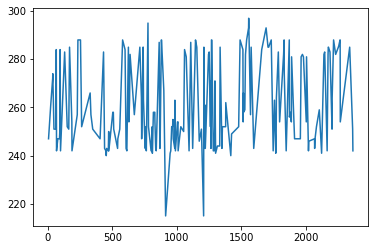

In [22]:
df6['Length']=0
df6['Length'] = df6['kinseq'].apply(lambda x:len(x))
df6['Length'].plot()
df6['Length'].max()

In [23]:
maxlencount = 336 #psp 학습데이터 최대값 336입력

In [24]:
df6['kinseq'] = df6['kinseq'].apply(lambda x:x.ljust(maxlencount,'0'))

In [25]:
df6['Substrate'] = df6['Substrate'].apply(lambda x:x.upper())

In [26]:
df6

,Substrate accession number,Substrate Gene name/s,Substrate,Phosphorylating protein kinases,Bioassay/s,Literature support,Source database,Dephosphorylation site and 5 amino acid window around it,Dephosphorylating protein phosphatases,Literature support.1,kinseq,Length
4,O00401,"N-WASP, WASL",EITTNRFYGPQVNNI,ABL1,"in vitro, in vivo","16199863, 17389395, 18452278, 18707149, 194156...",HPRD,y256_TSKVIyDFIEK,PTPN2,16293614,MKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAV...,247
4,O00401,"N-WASP, WASL",RETSKVIYDFIEKTG,ABL1,"in vitro, in vivo","16199863, 17389395, 18452278, 18707149, 194156...",HPRD,y256_TSKVIyDFIEK,PTPN2,16293614,MKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAV...,247
21,O14745,"NHERF1, SLC9A3R1",PALVRSASSDTSEEL,GRK6,in vivo,"15302935, 18088087, 18452278, 18669648, 194133...",HPRD,"340_340, s339_AHQKRSSKRAP HQKRSsKRAPQ","PPP2CA, PPP2CB, PTP4A3","22301917,22523604, 25897829",RQYRVLGKGGFGEVCACQVRATGKMYACKKLEKKRIKKRKGEAMAL...,261
36,O14920,"IKBKB, IKKB",AKELDQGSLCTSFVG,CHUK,"in vitro, in vivo","10022904, 10195894, 10779355, 9689078",HPRD,"s177_ELDQGsLCTSF, s181_GSLCTsFVGTL","PPM1A, PPM1B, PPM1M, PPP2CA, PPP2CB","14585847, 17188031, 18930133, 19594441, 19607706",MRERLGTGGFGNVCLYQHRELDLKIAIKSCRLELSTKNRERWCHEI...,272
36,O14920,"IKBKB, IKKB",DQGSLCTSFVGTLQY,CHUK,"in vitro, in vivo","10022904, 10195894, 10779355, 9689078",HPRD,"s177_ELDQGsLCTSF, s181_GSLCTsFVGTL","PPM1A, PPM1B, PPM1M, PPP2CA, PPP2CB","14585847, 17188031, 18930133, 19594441, 19607706",MRERLGTGGFGNVCLYQHRELDLKIAIKSCRLELSTKNRERWCHEI...,272
...,...,...,...,...,...,...,...,...,...,...,...,...
2269,Q15256,PTPRR,RPAYDPSSNLLAMDG,PRKACA,in vitro,10601328,HPRD,NaN,NaN,NaN,FERIKTLGTGSFGRVMLVKHKETGNHYAMKILDKQKVVKLKQIEHT...,254
2342,Q9Y5B0,CTDP1,AGESLDQSMEEEEEE,CSNK2A2,"in vitro, in vivo","12591939, 18669648, 19664994, 19664995",HPRD,NaN,NaN,NaN,YQLVRKLGRGKYSEVFEAINITNNERVVVKILKPVKKKKIKREVKI...,285
2342,Q9Y5B0,CTDP1,TKAQRENSPAAFPDR,CSNK2A2,"in vitro, in vivo","12591939, 18669648, 19664994, 19664995",HPRD,NaN,NaN,NaN,YQLVRKLGRGKYSEVFEAINITNNERVVVKILKPVKKKKIKREVKI...,285
2365,O60825,PFKFB2,PVRMRRNSFTPLSSS,PRKAA2,"in vitro, in vivo","12853467, 17924679, 18669648, 18767875, 194133...",HPRD,NaN,NaN,NaN,VLGDTLGVGTFGKVKIGEHQLTGHKVAVKILNRQKIRSLDVVGKIK...,251


In [27]:
df6['answer'] = 1

In [28]:
# #SYT ratio,substrate ratio exact match
# hash_data = pd.read_csv('/home/geonwon/Code/Calpha.txt', sep='\t')
# del hash_data['Unnamed: 0']
# hash_data.columns
# characters = hash_data.columns
# characters
# dfpsp2['singleSITE'] = dfpsp2['SITE_+/-7_AA'].apply(lambda x:list(x))
# valuestocount = []
# for j in range(17721):
#     for i in dfpsp2['singleSITE'].iloc[j]:
#         for n in characters:
#             if i == n:
#                 valuestocount.append(n)

# A = valuestocount.count('A')
# C = valuestocount.count('C')
# D = valuestocount.count('D')
# E = valuestocount.count('E')
# F = valuestocount.count('F')
# G = valuestocount.count('G')
# H = valuestocount.count('H')
# I = valuestocount.count('I')
# K = valuestocount.count('K')
# L = valuestocount.count('L')
# M = valuestocount.count('M')
# N = valuestocount.count('N')
# P = valuestocount.count('P')
# Q = valuestocount.count('Q')
# R = valuestocount.count('R')
# S = valuestocount.count('S')
# T = valuestocount.count('T')
# V = valuestocount.count('V')
# W = valuestocount.count('W')
# Y = valuestocount.count('Y')
# allcount = A + C + D + E + F + G+ H +I +K +L +M +N +P+ Q+ R+ S+ T+ V+ W +Y
# index = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
# dfop = pd.DataFrame({'aacount': [A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y]}, index = index)
# dfop['ratio'] = dfop['aacount'].apply(lambda x:x/allcount)

# percentage = dfop['ratio']
# total = 265815
# repeats = np.around(np.array(percentage) * total).astype(np.int64)  # [6, 3, 2]
# characters = np.repeat(index, repeats)
# userId   = ''.join([random.choice(characters) for _ in range(7)])
# selectedcharacters = ['S', 'Y', 'T']
# userId += ''.join([random.choice(selectedcharacters) for _ in range(1)])
# userId += ''.join([random.choice(characters) for _ in range(7)])
# dfTemp = df6.copy()
# dfTemp['answer'] = 0
# dfTemp['Substrate'] = ''
# dfTemp['Substrate'] = dfTemp['Substrate'].apply(lambda x:x.join([random.choice(characters) for _ in range(8)]))
# dfTemp['Substrate'] = dfTemp['Substrate'].apply(lambda x:x.join([random.choice(selectedcharacters)]))
# dfTemp['Substrate'] = dfTemp['Substrate'].apply(lambda x:x.join([random.choice(characters) for _ in range(8)]))

# df7 = pd.concat([df6,dfTemp],axis=0)

In [29]:
kinsub = pd.DataFrame({'kin':df6['kinseq'],'sub':df6['Substrate']})
kinsub

,kin,sub
4,MKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAV...,EITTNRFYGPQVNNI
4,MKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAV...,RETSKVIYDFIEKTG
21,RQYRVLGKGGFGEVCACQVRATGKMYACKKLEKKRIKKRKGEAMAL...,PALVRSASSDTSEEL
36,MRERLGTGGFGNVCLYQHRELDLKIAIKSCRLELSTKNRERWCHEI...,AKELDQGSLCTSFVG
36,MRERLGTGGFGNVCLYQHRELDLKIAIKSCRLELSTKNRERWCHEI...,DQGSLCTSFVGTLQY
...,...,...
2269,FERIKTLGTGSFGRVMLVKHKETGNHYAMKILDKQKVVKLKQIEHT...,RPAYDPSSNLLAMDG
2342,YQLVRKLGRGKYSEVFEAINITNNERVVVKILKPVKKKKIKREVKI...,AGESLDQSMEEEEEE
2342,YQLVRKLGRGKYSEVFEAINITNNERVVVKILKPVKKKKIKREVKI...,TKAQRENSPAAFPDR
2365,VLGDTLGVGTFGKVKIGEHQLTGHKVAVKILNRQKIRSLDVVGKIK...,PVRMRRNSFTPLSSS


In [30]:
kinsub['type'] = kinsub['sub'].apply(lambda x:x[7])

In [31]:
kinsub = kinsub[(kinsub['type'] != 'R')&(kinsub['type'] != 'I')]

In [32]:
kinsubST = kinsub[(kinsub['type'] == 'S')|(kinsub['type'] == 'T')]

In [33]:
kinsubY = kinsub[kinsub['type'] == 'Y']

In [34]:
kinST = list(set(kinsubST['kin']))
subST = list(set(kinsubST['sub']))
dffinalST = pd.DataFrame(index=range(0,0), columns=['kin', 'sub'])

def make_dfST(i):
    global dffinalST
    dftemp = pd.DataFrame({'kin':[kinST[i] for j in range(len(subST))],'sub':subST})
    dffinalST = pd.concat([dffinalST,dftemp])
    return dffinalST

for i in tqdm(range(len(kinST))):
    make_dfST(i)

  0%|          | 0/60 [00:00<?, ?it/s]

In [35]:
kinY = list(set(kinsubY['kin']))
subY = list(set(kinsubY['sub']))
dffinalY = pd.DataFrame(index=range(0,0), columns=['kin', 'sub'])
def make_dfY(i):
    global dffinalY
    dftemp = pd.DataFrame({'kin':[kinY[i] for j in range(len(subY))],'sub':subY})
    dffinalY = pd.concat([dffinalY,dftemp])
    return dffinalY

for i in tqdm(range(len(kinY))):
    make_dfY(i)

  0%|          | 0/24 [00:00<?, ?it/s]

In [36]:
dffinalST['type']=dffinalST['sub'].apply(lambda x:x[7])
dffinalY['type']=dffinalY['sub'].apply(lambda x:x[7])

In [37]:
dffinalST = pd.concat([dffinalST,kinsubST], join='outer')
dffinalST = dffinalST.drop_duplicates(keep = False)

In [38]:
dffinalY = pd.concat([dffinalY,kinsubY], join='outer')
dffinalY = dffinalY.drop_duplicates(keep = False)

In [39]:
dffinal = pd.concat([dffinalST,dffinalY], join='outer')

In [40]:
dffinal['sub'] = dffinal['sub'].apply(lambda x:x.ljust(15,'0'))

In [41]:
dffinal.to_csv("testkin-subdffinal.csv")
dffinal = pd.read_csv("testkin-subdffinal.csv")

In [42]:
hash_data = pd.read_csv('/home/geonwon/Code/Calpha.txt', sep='\t')

In [43]:
def make_matrix(df):
   # 해시값 불러오기
    hash_data = pd.read_csv('/home/geonwon/Code/Calpha.txt', sep='\t')
    hash_data.set_index(hash_data['Unnamed: 0'], inplace=True)
   # 불필요한 칼럼 정리
    del hash_data['Unnamed: 0']
    hash_data = np.exp(-1*hash_data)#ver2
    hash_data_list = []
    
    for amino in df['kin']:
        if amino in hash_data.columns:
            for target in df['sub']:
                if target == '_' or target == 'X' or target == 'U' or target == '0':
                    hash_data_list.append(0)
                else:
                    hash_data_list.append(hash_data[amino][target])   
        elif amino not in hash_data.columns:
            for target in df['sub']:
                hash_data_list.append(0)
   
    if len(df['sub'])==15:
        matrix = np.array(hash_data_list).reshape(1,336,15).astype('float16')
        
    return matrix

def make_df(df):
    df['matrix'] = df.apply(make_matrix, axis = 1)
    return df

def parallelize_dataframe(df, func):
    import numpy as np
    df_split = np.array_split(df, num_cores)
    pool = Pool(num_cores)
    df1 = np.concatenate(pool.map(func, df_split), axis = 0)
    pool.close()
    pool.join()
    return df1

In [44]:
df4 = parallelize_dataframe(dffinal, make_df)

In [45]:
with open( "dfdepodhmmkinsub.pickle", "wb" ) as file:
    pickle.dump( df4, file)

with open( "dfdepodhmmkinsub.pickle", "rb" ) as file:
    loaded_data = pickle.load(file)

In [48]:
loaded_data

array([[0,
        'KQVLGLGVNGKVLECFHRRTGQKCALKLLYDSPKARQEVDHHWQASGGPHIVCILDVYENMHHGKRCLLIIMECMEGGELFSRIQERGDQAFTEREAAEIMRDIGTAIQFLHSHNIAHRDVKPENLLYTSKEKDAVLKLTDFGFAKETTQNALQTPCYTPYYVAPEVLGPEKYDKSCDMWSLGVIMYILLCGFPPFYSNTGQAISPGMKRRIRLGQYGFPNPEWSEVSEDAKQLIRLLLKTDPTERLTITQFMNHPW0000000000000000000000000000000000000000000000000000000000000000000000000000000',
        'RAKGQDASLEFTFHV', 'S',
        array([[[0.7046, 0.9277, 0.8145, ..., 0.976 , 0.6885, 0.945 ],
                [0.926 , 1.072 , 0.886 , ..., 0.9473, 0.886 , 0.958 ],
                [1.035 , 1.363 , 0.945 , ..., 1.161 , 1.01  , 1.498 ],
                ...,
                [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
                [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
                [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]]],
              dtype=float16)                                            ],
       [1,
        'KQVLGLGVNGKVLECFHRRTGQKCALKLLYDSPKARQEVDHHWQASGGPHIVCILDVYENMHHGK